## **Addestramento Linear Regressor**

# Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Importazione del dataset pulito

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_data.csv')


In [4]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,hour,day_of_week,month,year,is_weekend,lag_1,lag_24,lag_168,traffic_volume
0,none,6.20,0.0,0.0,90.0,clouds,overcast clouds,9.0,1.0,10.0,2012.0,False,5765.0,4832.0,5545.0,5599.0
1,none,8.22,0.0,0.0,90.0,clouds,overcast clouds,10.0,1.0,10.0,2012.0,False,5599.0,4395.0,4516.0,4534.0
2,none,9.96,0.0,0.0,90.0,clouds,overcast clouds,11.0,1.0,10.0,2012.0,False,4534.0,4411.0,4767.0,4691.0
3,none,10.93,0.0,0.0,75.0,clouds,broken clouds,12.0,1.0,10.0,2012.0,False,4691.0,4648.0,5026.0,5067.0
4,none,11.99,0.0,0.0,75.0,clouds,broken clouds,13.0,1.0,10.0,2012.0,False,5067.0,4602.0,4918.0,5030.0


In [5]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

## **Train-Test Split**

La dimensione del test set è fissata ad un anno e rappresenta il periodo 01/10/2017-30/09/2018

In [8]:
from sklearn.model_selection import train_test_split
# Numero di righe per train - In modo da isolare l'ultimo anno intero (01/10/2017-30/09/2018) come test set
n_train = 26064

# Train set
xtrain = X.iloc[:n_train]   # se X è DataFrame
ytrain = Y.iloc[:n_train]   # se Y è Series/DataFrame

# Test set
xtest = X.iloc[n_train:]    # dalla riga n_train fino alla fine
ytest = Y.iloc[n_train:]

#xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0, shuffle=False)

print("Dimensioni TRAINING SET",xtrain.shape, ytrain.shape)
print("Dimensioni TEST SET",xtest.shape, ytest.shape)


Dimensioni TRAINING SET (26064, 15) (26064,)
Dimensioni TEST SET (8664, 15) (8664,)


## **Modello - Regressione Lineare RIDGE**

In [ ]:
"""
NON PIU UTILIZZATO PER PASSAGGIO A RIDGE

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- 1. Definizione delle Feature ---
numeric_features = [
    'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'lag_1', 'lag_24', 'lag_168'
]

categorical_features = [
    'hour', 'month', 'day_of_week', 'holiday', 'weather_main', 'weather_description', 'is_weekend'
]

# --- 2. Definizione e Istanziazione dei Transformer  ---

# Encoder per le variabili categoriche
encoder = OneHotEncoder(
    handle_unknown='ignore', # ESSENZIALE per prevenire KeyError su dati di test/futuri
    sparse_output=False
)

# Scaler per le variabili numeriche
scaler = StandardScaler()


# --- 3. Creazione del Preprocessore (ColumnTransformer) ---
preprocessor = ColumnTransformer([
    # 'cat' applicherà l'encoder alle colonne categoriche
    ('cat', encoder, categorical_features),
    # 'num' applicherà lo scaler alle colonne numeriche
    ('num', scaler, numeric_features)
])

# --- 4. Crea pipeline completa con modello ---
pipe = Pipeline([
    ('preprocessor', preprocessor), # Il preprocessore definito sopra
    ('model', LinearRegression())
])


# --- 5. Addestra la pipeline sul training set ---
# QUI avvengono il FIT del preprocessore (scaler e encoder) e il FIT del modello
print("Inizio addestramento della Pipeline (Preprocessore + Modello)...")
pipe.fit(xtrain, ytrain)
print("Addestramento completato. Preprocessore e modello sono ora fittati.")

# --- 6. Predizione sul test set ---
pred = pipe.predict(xtest)

"""

Inizio addestramento della Pipeline (Preprocessore + Modello)...
Addestramento completato. Preprocessore e modello sono ora fittati.


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# --- 1. Definizione delle Feature ---
numeric_features = [
    'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'lag_1', 'lag_24', 'lag_168'
]

categorical_features = [
    'hour', 'month', 'day_of_week', 'holiday', 'weather_main', 'weather_description', 'is_weekend'
]

# --- 2. Definizione e Istanziazione dei Transformer  ---

# Encoder per le variabili categoriche
encoder = OneHotEncoder(
    handle_unknown='ignore', # ESSENZIALE per prevenire KeyError su dati di test/futuri
    sparse_output=False
)

# Scaler per le variabili numeriche
scaler = StandardScaler()


# --- 3. Creazione del Preprocessore (ColumnTransformer) ---
preprocessor = ColumnTransformer([
    # 'cat' applicherà l'encoder alle colonne categoriche
    ('cat', encoder, categorical_features),
    # 'num' applicherà lo scaler alle colonne numeriche
    ('num', scaler, numeric_features)
])

# --- 4. Crea pipeline completa con modello ---
pipe = Pipeline([
    ('preprocessor', preprocessor), # Il preprocessore definito sopra
    ('model', Ridge())
])

# Effettua CV per fare finetuning del parametro alpha di Ridge.
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
import numpy as np

# --- 1. Definisci la griglia di parametri ---
param_grid = {
    'model__alpha': [ 0.01, 0.1, 1, 5, 8, 10, 100]  # puoi modificare / estendere i valori
}

# --- 2. Definisci TimeSeriesSplit per CV temporale ---
tscv = TimeSeriesSplit(n_splits=5)

# --- 3. Crea GridSearchCV ---
gs = GridSearchCV(
    estimator=pipe,           # pipeline completa
    param_grid=param_grid,    # griglia di iperparametri
    cv=tscv,                  # CV temporale
    scoring='neg_mean_absolute_error',  # punteggio da ottimizzare
    n_jobs=-1                  # parallelizza su tutti i core
)
# --- 4. Fitta GridSearch sul training set ---
gs.fit(xtrain, ytrain)

# --- 5. Risultati ---
print("Miglior alpha:", gs.best_params_['model__alpha'])
print("Miglior MAE (CV):", -gs.best_score_)
print("Tutti i punteggi:", -gs.cv_results_['mean_test_score'])

# Settaggio miglior alpha
pipe.set_params(model__alpha= gs.best_params_['model__alpha'])

print("Inizio addestramento della Pipeline (Preprocessore + Modello)...")
pipe.fit(xtrain, ytrain)
print("Addestramento completato. Preprocessore e modello sono ora fittati.")

# --- 6. Predizione sul test set ---
pred = pipe.predict(xtest)


Miglior alpha: 10
Miglior MAE (CV): 266.81729388582073
Tutti i punteggi: [267.78617683 267.74662695 267.48483343 266.95363031 266.83521631
 266.81729389 272.92917421]
Inizio addestramento della Pipeline (Preprocessore + Modello)...
Addestramento completato. Preprocessore e modello sono ora fittati.


## **Metriche di valutazione**

In [37]:
import sklearn.metrics as metrics
print('R Squared : ',metrics.r2_score(ytest,pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

R Squared :  0.9610589860509766
Mean Absolute Error :  262.6896899594105
Mean Squared Error :  151206.88604705207
Root Mean Squared Error :  388.85329630472734


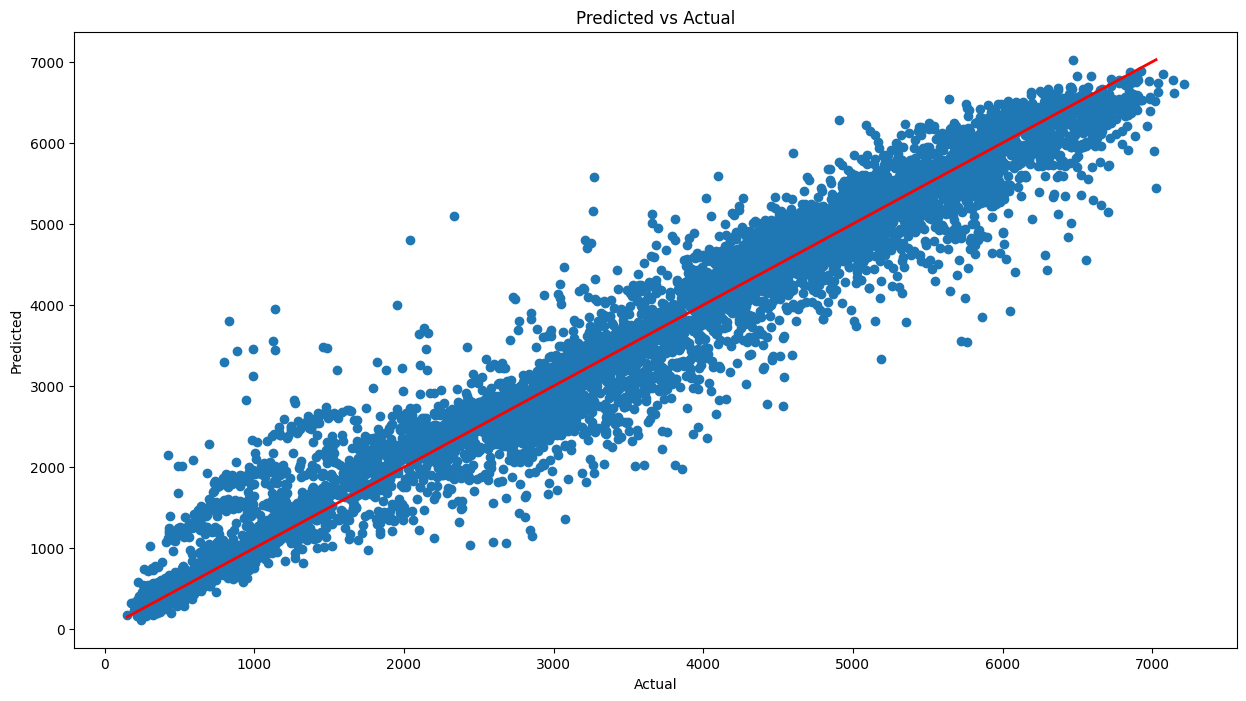

In [31]:
plt.figure(figsize=(15,8))
plt.scatter(ytest, pred)

# Usa scalari e non chiamare la variabile "range"
lims = [float(ytest.min()), float(pred.max())]

plt.plot(lims, lims, color='red', linewidth=2)
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Valutazione dell'utilizzo di **Polynomial Transformation**


Per comprendere se è necessario utilizzare una regressione polinomiale, osserveremo lo **scatter plot dei residui**.


In [ ]:
import matplotlib.pyplot as plt

<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:7: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-2659393949.py:7: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Valori Predetti ($\hat{y}$)', fontsize=14)
/tmp/ipython-input-2659393949.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Residui ($y - \hat{y}$)', fontsize=14)


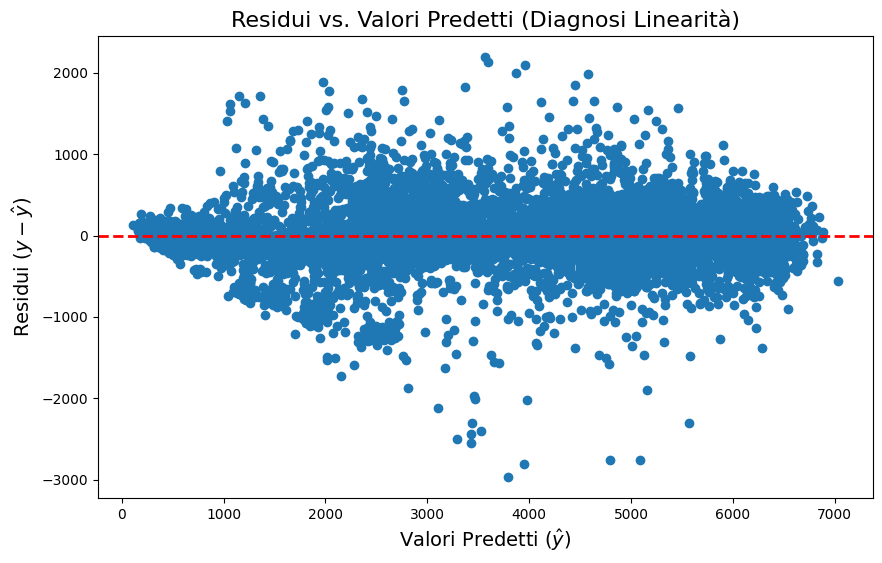


**Interpretazione per la Linearità:**
- OK: I punti sono dispersi casualmente attorno allo zero.
- NON OK: Se si nota una forma a 'U', a 'S', o qualsiasi altra curva, la relazione non è lineare.


In [14]:
residuals = ytest - pred

plt.figure(figsize=(10, 6))
plt.scatter(pred, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Linea di riferimento a y=0
plt.title('Residui vs. Valori Predetti (Diagnosi Linearità)', fontsize=16)
plt.xlabel('Valori Predetti ($\hat{y}$)', fontsize=14)
plt.ylabel('Residui ($y - \hat{y}$)', fontsize=14)
plt.show()

print("\n**Interpretazione per la Linearità:**")
print("- OK: I punti sono dispersi casualmente attorno allo zero.")
print("- NON OK: Se si nota una forma a 'U', a 'S', o qualsiasi altra curva, la relazione non è lineare.")

L'analisi del grafico Residui vs. Valori Predetti non mostra evidenza di non-linearità, suggerendo che il modello è strutturalmente corretto, quindi abbiamo ritenuto non necessario applicare una trasformazione polinomiale delle feature.

# Confronto con baseline "ora precedente"

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1. Preparazione dataset ===
df = pd.read_csv('/content/drive/MyDrive/Datasets/cleaned_data_with_datetime.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.set_index('date_time')

# Introduzione dei gap
gap_hours = df.index.to_series().diff().dt.total_seconds() / 3600
df.loc[gap_hours > 1, 'traffic_volume'] = np.nan

# === 2. Divisione train/test percentuale ===
X = df.drop(columns=['traffic_volume'])
Y = df['traffic_volume']

xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.25, shuffle=False
)

# === 3. Baseline "ora precedente" ===
y_pred = ytest.shift(1)
time_diff = ytest.index.to_series().diff().dt.total_seconds() / 3600
mask = (time_diff == 1) & y_pred.notna()  # esclude righe con gap

y_true_aligned = ytest[mask]
y_pred_aligned = y_pred[mask]

# === 4. Metriche ===
mae_baseline = mean_absolute_error(y_true_aligned, y_pred_aligned)
rmse_baseline = np.sqrt(mean_squared_error(y_true_aligned, y_pred_aligned))

print(f"MAE baseline ora precedente: {mae_baseline}")
print(f"RMSE baseline ora precedente: {rmse_baseline}")


MAE baseline ora precedente: 590.8036816963765
RMSE baseline ora precedente: 817.8006040791096


Si può osservare come il modello di regressione lineare **sia in grado di battere nettamente una baseline semplice** come quella che predice l'ora di ciascuna riga come quella (nota) dell'ora della riga che la precede.

## Addestramento su tutto il dataset


TO DO

# Esportazione modello


In [38]:
# === Export modello LinearRegression ===

from joblib import dump
import pickle

#Export con pickle
with open("/content/drive/MyDrive/Models/linear_regression_pipeline.pkl", "wb") as f:
    pickle.dump(pipe, f)
